# 인공지능 linear regression

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../datasets/Admission_Predict.csv', sep = ',')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df = pd.read_csv('../datasets/Admission_Predict.csv', sep = ',', index_col = 0)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


Text(0.5, 1.0, 'Distribution of Chance of Admit')

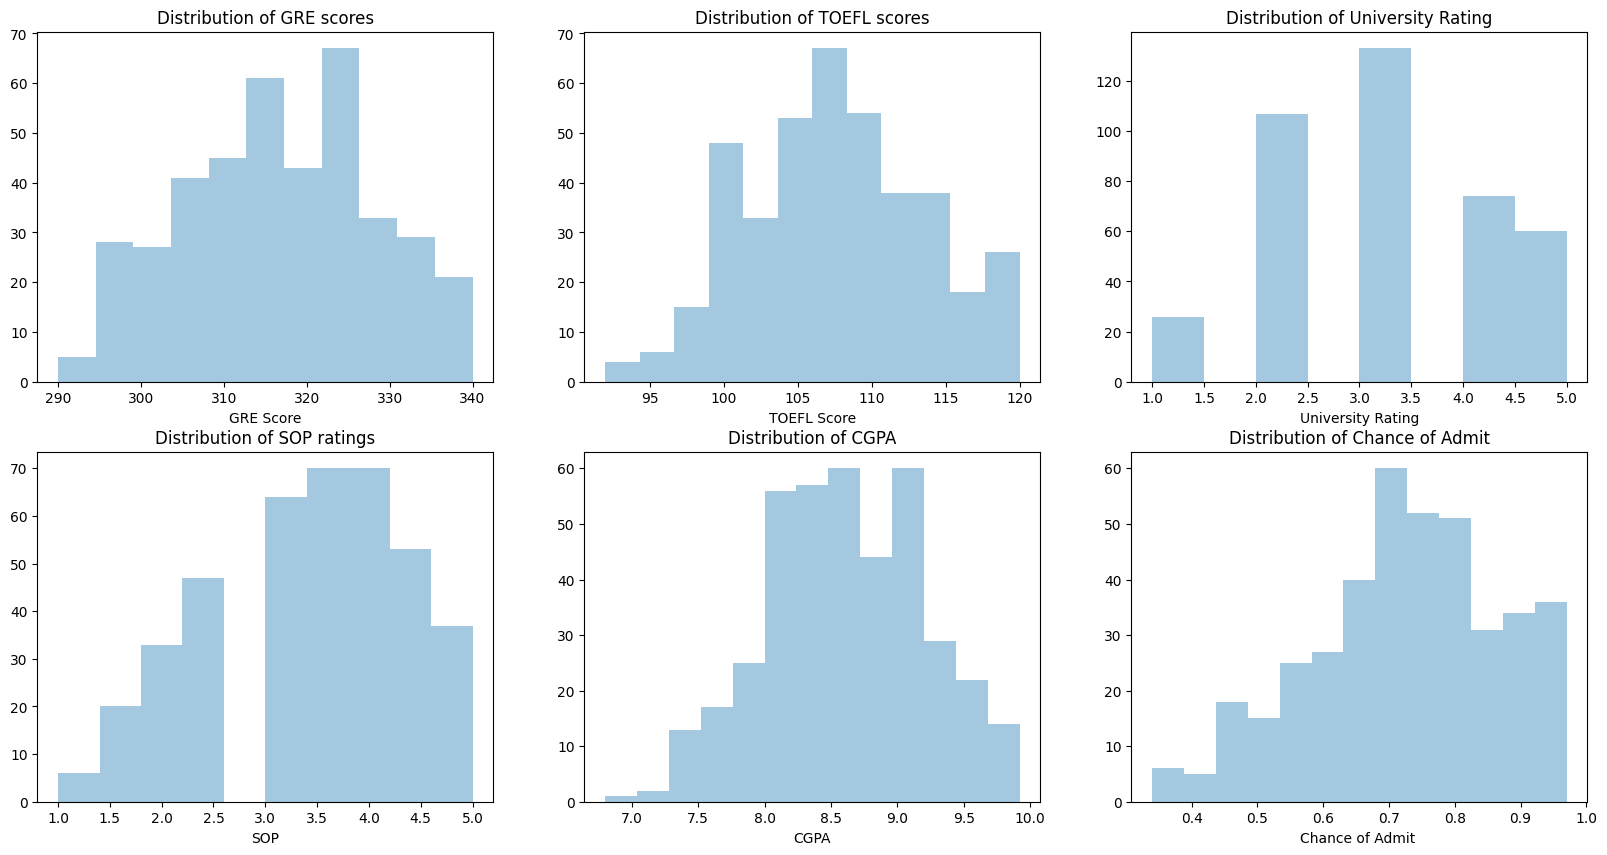

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))

sns.distplot(df['GRE Score'], kde = False, ax = axs[0, 0])
axs[0, 0].set_title("Distribution of GRE scores")

sns.distplot(df["TOEFL Score"], kde = False, ax = axs[0, 1])
axs[0, 1].set_title('Distribution of TOEFL scores')

sns.distplot(df['University Rating'], kde = False, ax = axs[0, 2])
axs[0, 2].set_title("Distribution of University Rating")

sns.distplot(df['SOP'], kde = False, ax = axs[1, 0])
axs[1, 0].set_title("Distribution of SOP ratings")

sns.distplot(df['CGPA'], kde = False, ax = axs[1, 1])
axs[1, 1].set_title("Distribution of CGPA")

sns.distplot(df['Chance of Admit '], kde = False, ax = axs[1, 2])
axs[1, 2].set_title("Distribution of Chance of Admit")


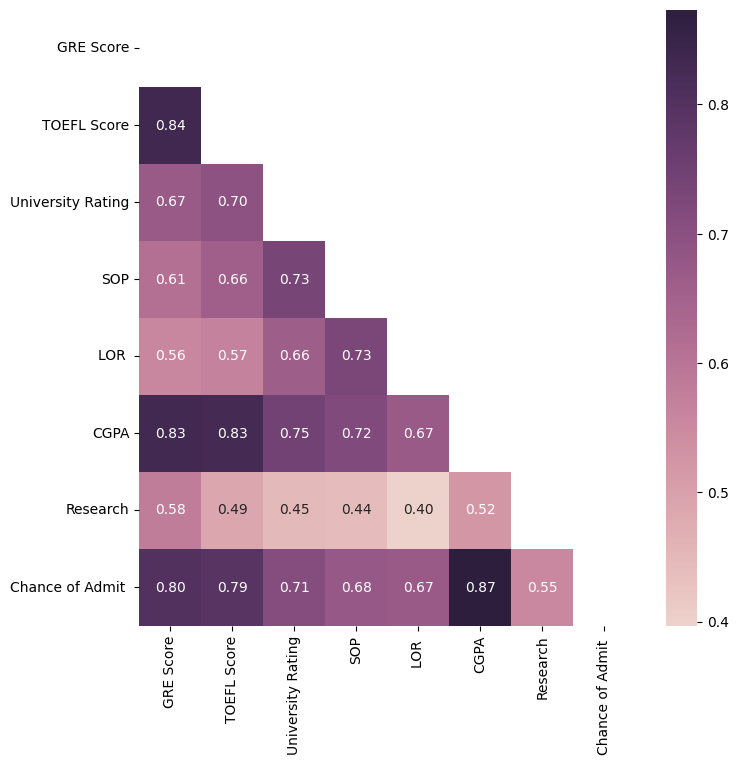

In [ ]:
corr = df.corr()
dropSelf = np.triu(np.ones_like(corr, dtype = bool))
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corr, cmap = sns.cubehelix_palette(as_cmap = True), annot = True, fmt = '.2f', mask = dropSelf)
plt.show()

In [13]:
X = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

In [16]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 7) (400,)
(320, 7) (320,)
(80, 7) (80,)


In [17]:
print(X.head())
print(X_train.head())

            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   

            Research  
Serial No.            
1                  1  
2                  1  
3                  1  
4                  1  
5                  0  
            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
4                 322          110                  3  3.5   2.5  8.67   
19                318          110                  3  4.0   3.0  8.80   
203               340   

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.round(y_pred, 2))
print(y_test.values)

[0.65 0.72 0.94 0.82 0.58 0.93 0.53 0.54 0.66 0.84 0.72 0.91 0.55 0.89
 0.7  0.69 0.67 0.48 0.69 0.97 0.59 0.65 0.71 0.54 0.95 0.81 0.69 0.56
 0.68 0.81 0.81 0.95 0.65 0.51 0.66 0.67 0.72 0.65 0.62 0.87 0.74 0.6
 0.77 0.96 0.85 0.84 0.95 0.65 0.92 0.86 0.9  0.73 0.79 0.95 0.57 0.59
 0.69 0.85 0.6  0.85 0.67 0.66 0.7  0.51 0.63 0.72 0.62 0.84 0.86 0.8
 0.72 0.81 0.87 0.83 0.53 0.72 0.69 0.59 0.88 0.76]
[0.68 0.68 0.9  0.79 0.44 0.94 0.43 0.36 0.72 0.85 0.45 0.93 0.64 0.93
 0.71 0.53 0.66 0.34 0.74 0.96 0.64 0.54 0.71 0.54 0.92 0.84 0.59 0.61
 0.7  0.74 0.82 0.94 0.71 0.46 0.69 0.56 0.72 0.58 0.61 0.9  0.73 0.64
 0.74 0.94 0.92 0.82 0.96 0.71 0.94 0.89 0.86 0.73 0.81 0.94 0.39 0.48
 0.71 0.86 0.65 0.86 0.57 0.61 0.79 0.44 0.64 0.74 0.64 0.83 0.89 0.84
 0.75 0.84 0.9  0.88 0.49 0.72 0.64 0.67 0.9  0.79]


In [20]:
print(mean_squared_error(y_test, y_pred))

0.004617003377285003


In [21]:
print('Training accuracy:', model.score(X_train, y_train))
print('Test accuracy:', model.score(X_test, y_test))

Training accuracy: 0.7951946003191085
Test accuracy: 0.8212082591486994


### 각 theta 값을 출력

In [ ]:
print(model.coef_)

[ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]


### model의 y절편 출력

In [25]:
print(model.intercept_)

-1.2302337510969934


### query 넣고 예측값 직접 구하기

In [32]:
print(model.intercept_ + model.coef_.T @ X_test.iloc[3])

0.8216431599284457
